# Blood Pressure Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Import dependencies
import numpy as np
import seaborn as sns
import os as os
import calendar

Load data

In [4]:
df = pd.read_csv('input/blood_pressure.csv')

In [7]:
df.dropna(inplace=True)
# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Drop rows with missing values
df.dropna(subset=['systolic pressure', 'diastolic pressure', 'bpm'], inplace=True)

# Data exploration
print(df.describe())

                           Timestamp  systolic pressure  diastolic pressure  \
count                            139         139.000000          139.000000   
mean   2024-02-21 21:12:31.079136768         138.179856           83.899281   
min              2023-12-20 08:00:00          83.000000           56.000000   
25%              2023-12-31 17:00:00         121.500000           75.000000   
50%              2024-01-12 08:00:00         141.000000           85.000000   
75%              2024-05-20 11:00:00         154.500000           93.000000   
max              2024-05-31 20:00:00         177.000000          112.000000   
std                              NaN          20.119301           11.261899   

              bpm  perindopril-arginin mg  perindopril-amlodipin mg  
count  139.000000              139.000000                139.000000  
mean    72.906475                4.280576                  1.726619  
min     62.000000                0.000000                  0.000000  
25%     

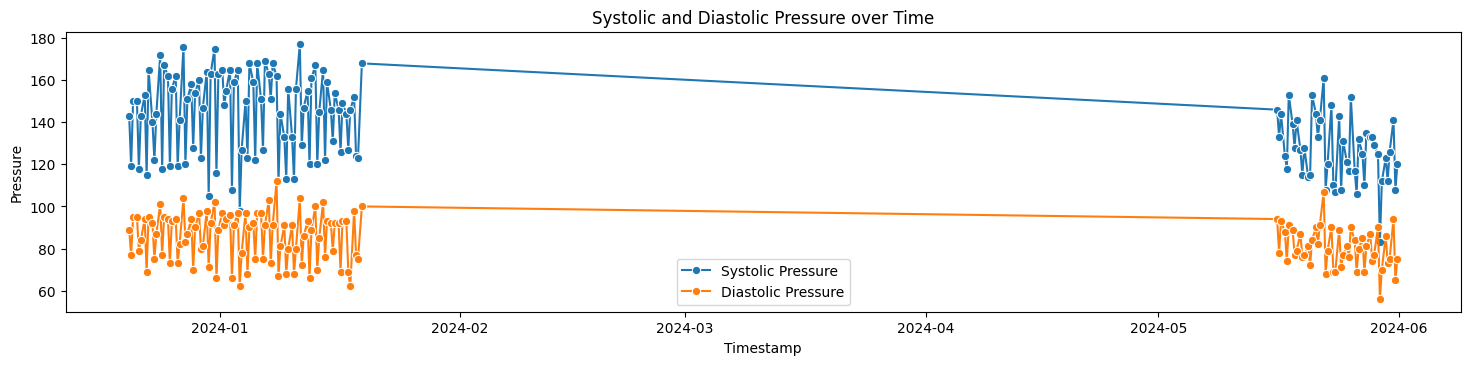

In [8]:
plt.figure(figsize=(18, 8))  # Wider figure
# Line plots for systolic and diastolic pressures
plt.subplot(2, 1, 1)
sns.lineplot(x='Timestamp', y='systolic pressure', data=df, marker='o', label='Systolic Pressure')
sns.lineplot(x='Timestamp', y='diastolic pressure', data=df, marker='o', label='Diastolic Pressure')
plt.xlabel('Timestamp')
plt.ylabel('Pressure')
plt.title('Systolic and Diastolic Pressure over Time')
plt.legend()

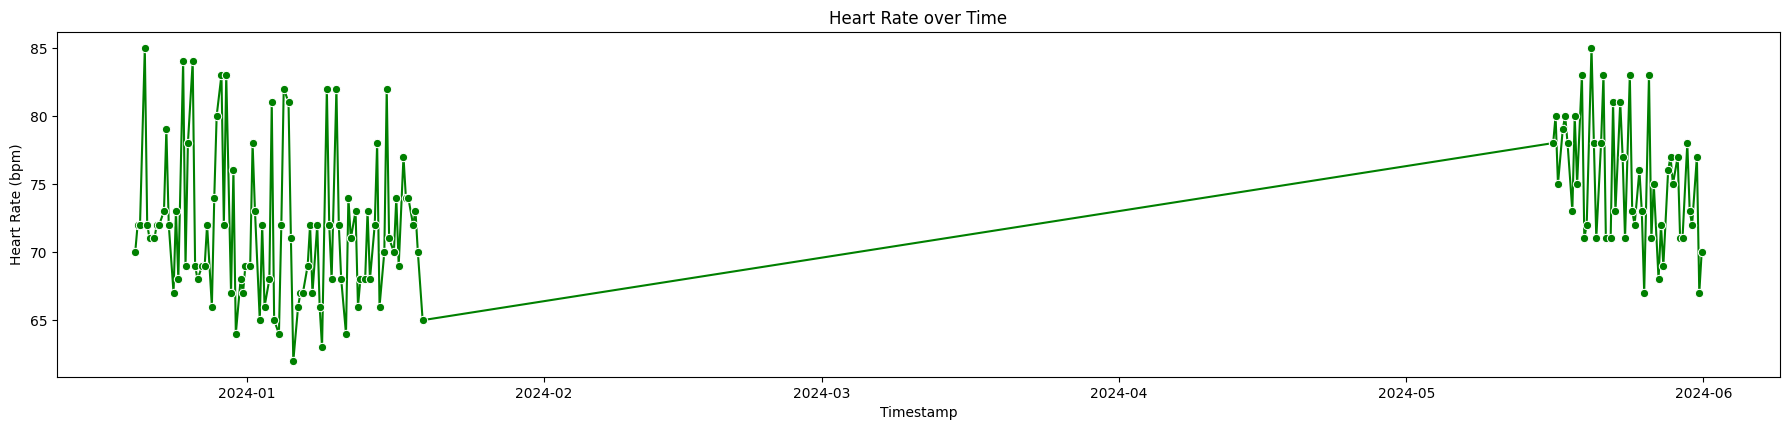

In [9]:
plt.figure(figsize=(18, 8))  # Wider figure
# Line plot for heart rate
plt.subplot(2, 1, 2)
sns.lineplot(x='Timestamp', y='bpm', data=df, marker='o', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate over Time')
plt.tight_layout()
plt.show()

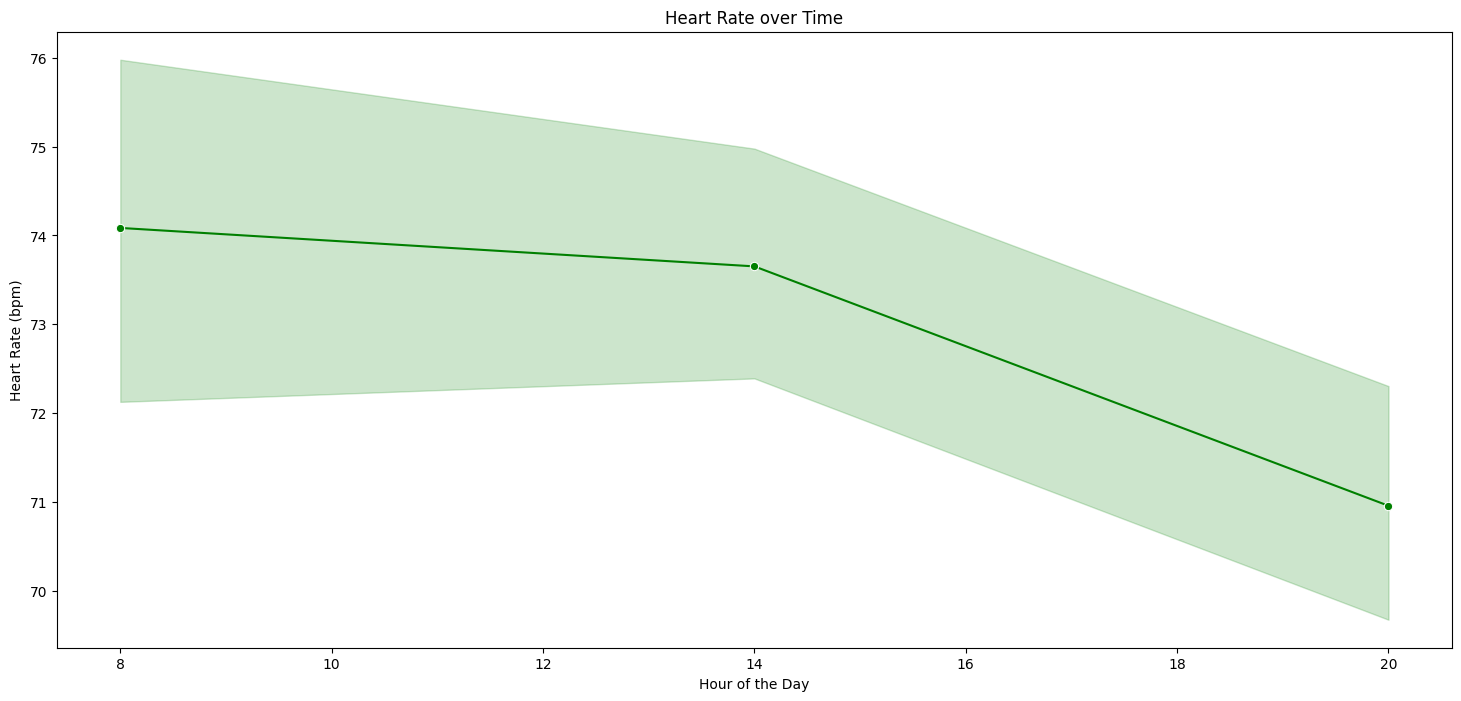

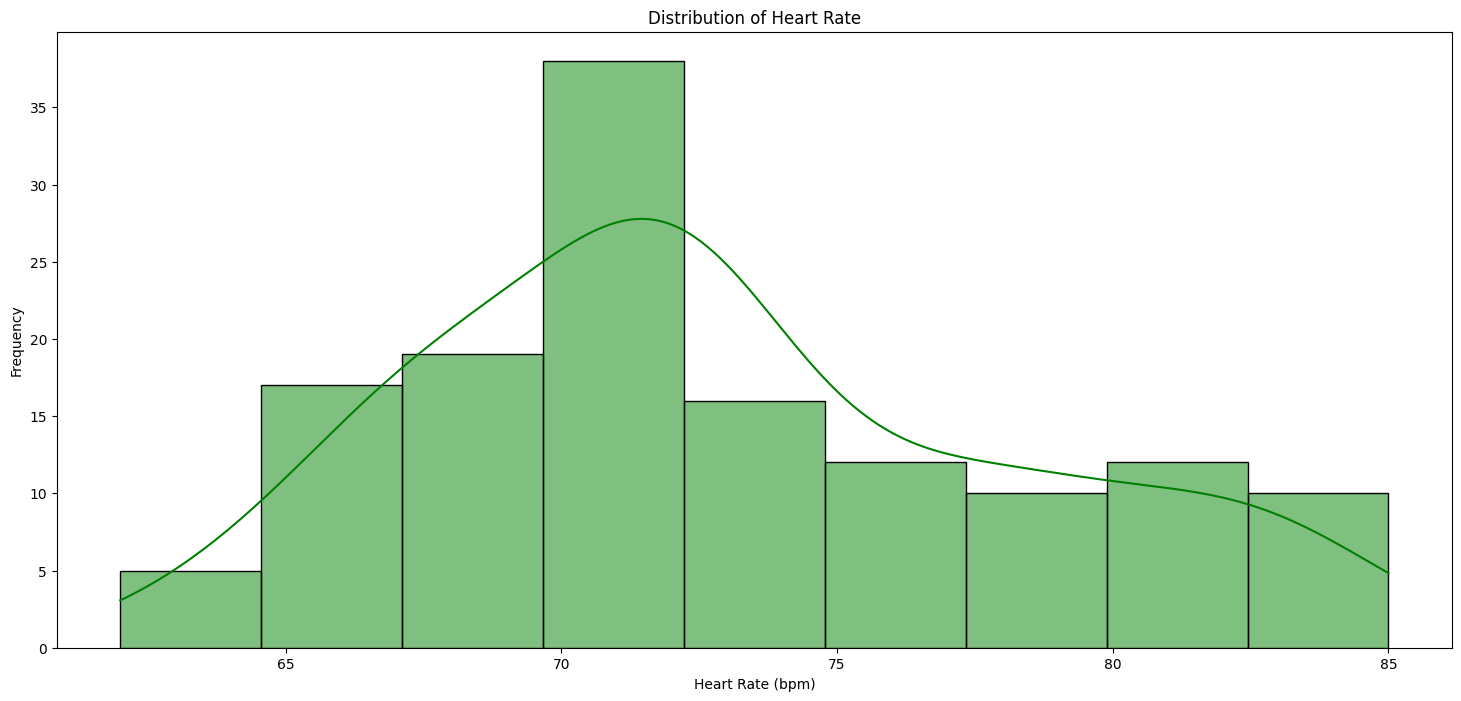

In [11]:
#Line plot for heart rate over time at different times of the day
df['hour'] = df['Timestamp'].dt.hour
plt.figure(figsize=(18, 8))
sns.lineplot(x='hour', y='bpm', data=df, marker='o', color='green')
plt.xlabel('Hour of the Day')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate over Time')
plt.show()

#showing the distribution of the heart rate
plt.figure(figsize=(18, 8))
sns.histplot(df['bpm'], kde=True, color='green')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.title('Distribution of Heart Rate')
plt.show()



## 5 mg dose of perindopril-arginin

In [14]:
#Calculate mean for each column except 'Timestamp' and 'mg' for where 'mg' is 5
mean = df[df['perindopril-arginin mg'] == 5].drop(columns=['Timestamp', 'perindopril-arginin mg']).mean()
print(f"Mean (Átlag) where 'perindopril-arginin mg' is 5:")
print(mean)

# Calculate standard deviation for each column except 'Timestamp' and 'mg' for where 'mg' is 5
std_dev = df[df['perindopril-arginin mg'] == 5].drop(columns=['Timestamp', 'perindopril-arginin mg']).std()
print(f"Standard deviation (Szórás) where 'perindopril-arginin mg' is 5:")
print(std_dev)

Mean (Átlag) where 'perindopril-arginin mg' is 5:
systolic pressure           144.603175
diastolic pressure           86.301587
bpm                          71.746032
perindopril-amlodipin mg      0.000000
hour                         14.000000
dtype: float64
Standard deviation (Szórás) where 'perindopril-arginin mg' is 5:
systolic pressure           20.789684
diastolic pressure          11.474565
bpm                          5.841918
perindopril-amlodipin mg     0.000000
hour                         4.938329
dtype: float64


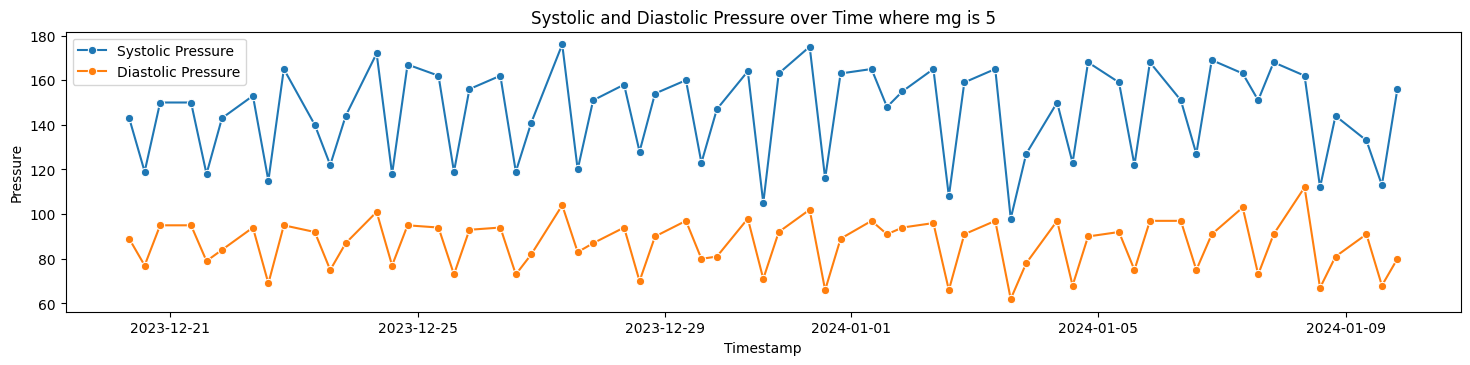

In [15]:
#visualize the data where 'perindopril-arginin mg' is 5
plt.figure(figsize=(18, 8))  # Wider figure
# Line plots for systolic and diastolic pressures
plt.subplot(2, 1, 1)
sns.lineplot(x='Timestamp', y='systolic pressure', data=df[df['perindopril-arginin mg'] == 5], marker='o', label='Systolic Pressure')
sns.lineplot(x='Timestamp', y='diastolic pressure', data=df[df['perindopril-arginin mg'] == 5], marker='o', label='Diastolic Pressure')
plt.xlabel('Timestamp')
plt.ylabel('Pressure')
plt.title('Systolic and Diastolic Pressure over Time where mg is 5')
plt.legend()
plt.show()

## 10 mg dose of perindopril-arginin

In [16]:
mean = df[df['perindopril-arginin mg'] == 10].drop(columns=['Timestamp', 'perindopril-arginin mg']).mean()
print(mean)
std_dev = df[df['perindopril-arginin mg'] == 10].drop(columns=['Timestamp', 'perindopril-arginin mg']).std()
print(std_dev)


systolic pressure           143.035714
diastolic pressure           84.500000
bpm                          71.571429
perindopril-amlodipin mg      0.000000
hour                         13.785714
dtype: float64
systolic pressure           17.389827
diastolic pressure          12.336336
bpm                          4.500441
perindopril-amlodipin mg     0.000000
hour                         5.028490
dtype: float64


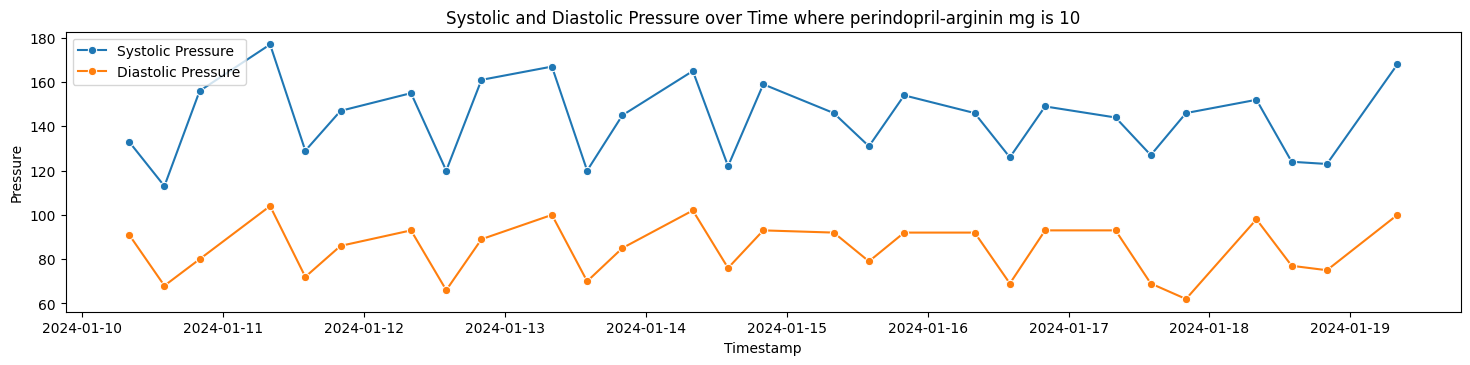

In [17]:
#visualize the data where 'perindopril-arginin mg' is 10
plt.figure(figsize=(18, 8))  # Wider figure
# Line plots for systolic and diastolic pressures
plt.subplot(2, 1, 1)
sns.lineplot(x='Timestamp', y='systolic pressure', data=df[df['perindopril-arginin mg'] == 10], marker='o', label='Systolic Pressure')
sns.lineplot(x='Timestamp', y='diastolic pressure', data=df[df['perindopril-arginin mg'] == 10], marker='o', label='Diastolic Pressure')
plt.xlabel('Timestamp')
plt.ylabel('Pressure')
plt.title('Systolic and Diastolic Pressure over Time where perindopril-arginin mg is 10')
plt.legend()
plt.show()

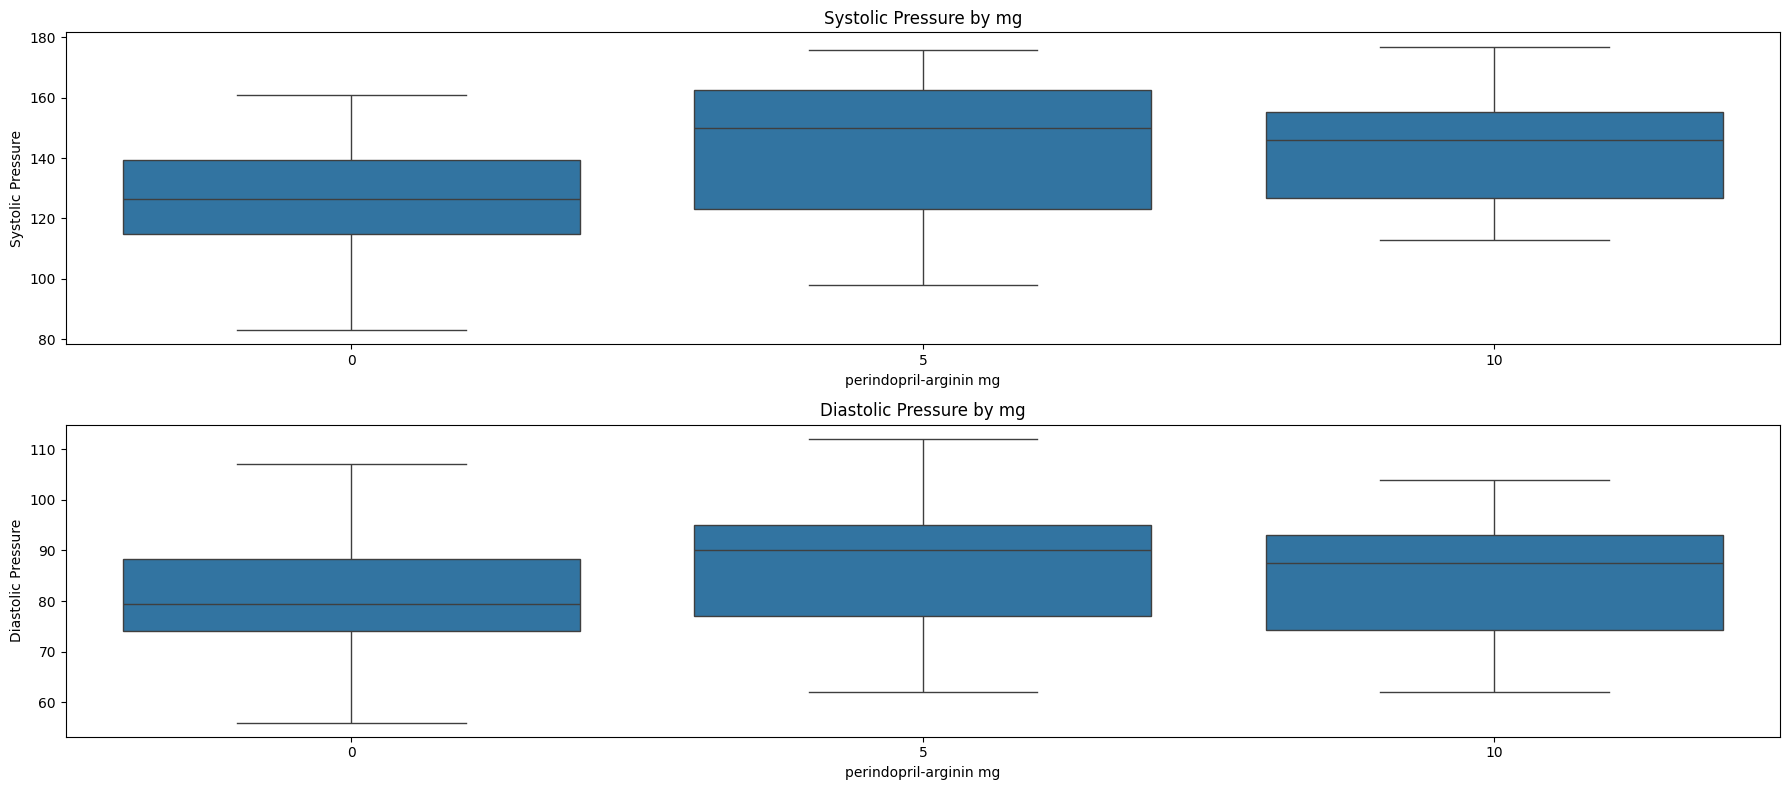

In [19]:
#show the data in a boxplot
plt.figure(figsize=(18, 8))
plt.subplot(2, 1, 1)
sns.boxplot(x='perindopril-arginin mg', y='systolic pressure', data=df)
plt.xlabel('perindopril-arginin mg')
plt.ylabel('Systolic Pressure')
plt.title('Systolic Pressure by mg')
plt.subplot(2, 1, 2)
sns.boxplot(x='perindopril-arginin mg', y='diastolic pressure', data=df)
plt.xlabel('perindopril-arginin mg')
plt.ylabel('Diastolic Pressure')
plt.title('Diastolic Pressure by mg')
plt.tight_layout()
plt.show()


In [20]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
print(f"Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
                          Timestamp  systolic pressure  diastolic pressure  \
Timestamp                  1.000000          -0.411796           -0.238867   
systolic pressure         -0.411796           1.000000            0.852607   
diastolic pressure        -0.238867           0.852607            1.000000   
bpm                        0.288686          -0.226052           -0.092756   
perindopril-arginin mg    -0.808534           0.334775            0.163517   
perindopril-amlodipin mg   0.993645          -0.408053           -0.226752   
hour                       0.007381          -0.066612           -0.339479   

                               bpm  perindopril-arginin mg  \
Timestamp                 0.288686               -0.808534   
systolic pressure        -0.226052                0.334775   
diastolic pressure       -0.092756                0.163517   
bpm                       1.000000               -0.271598   
perindopril-arginin mg   -0.271598           

<Figure size 1800x800 with 0 Axes>

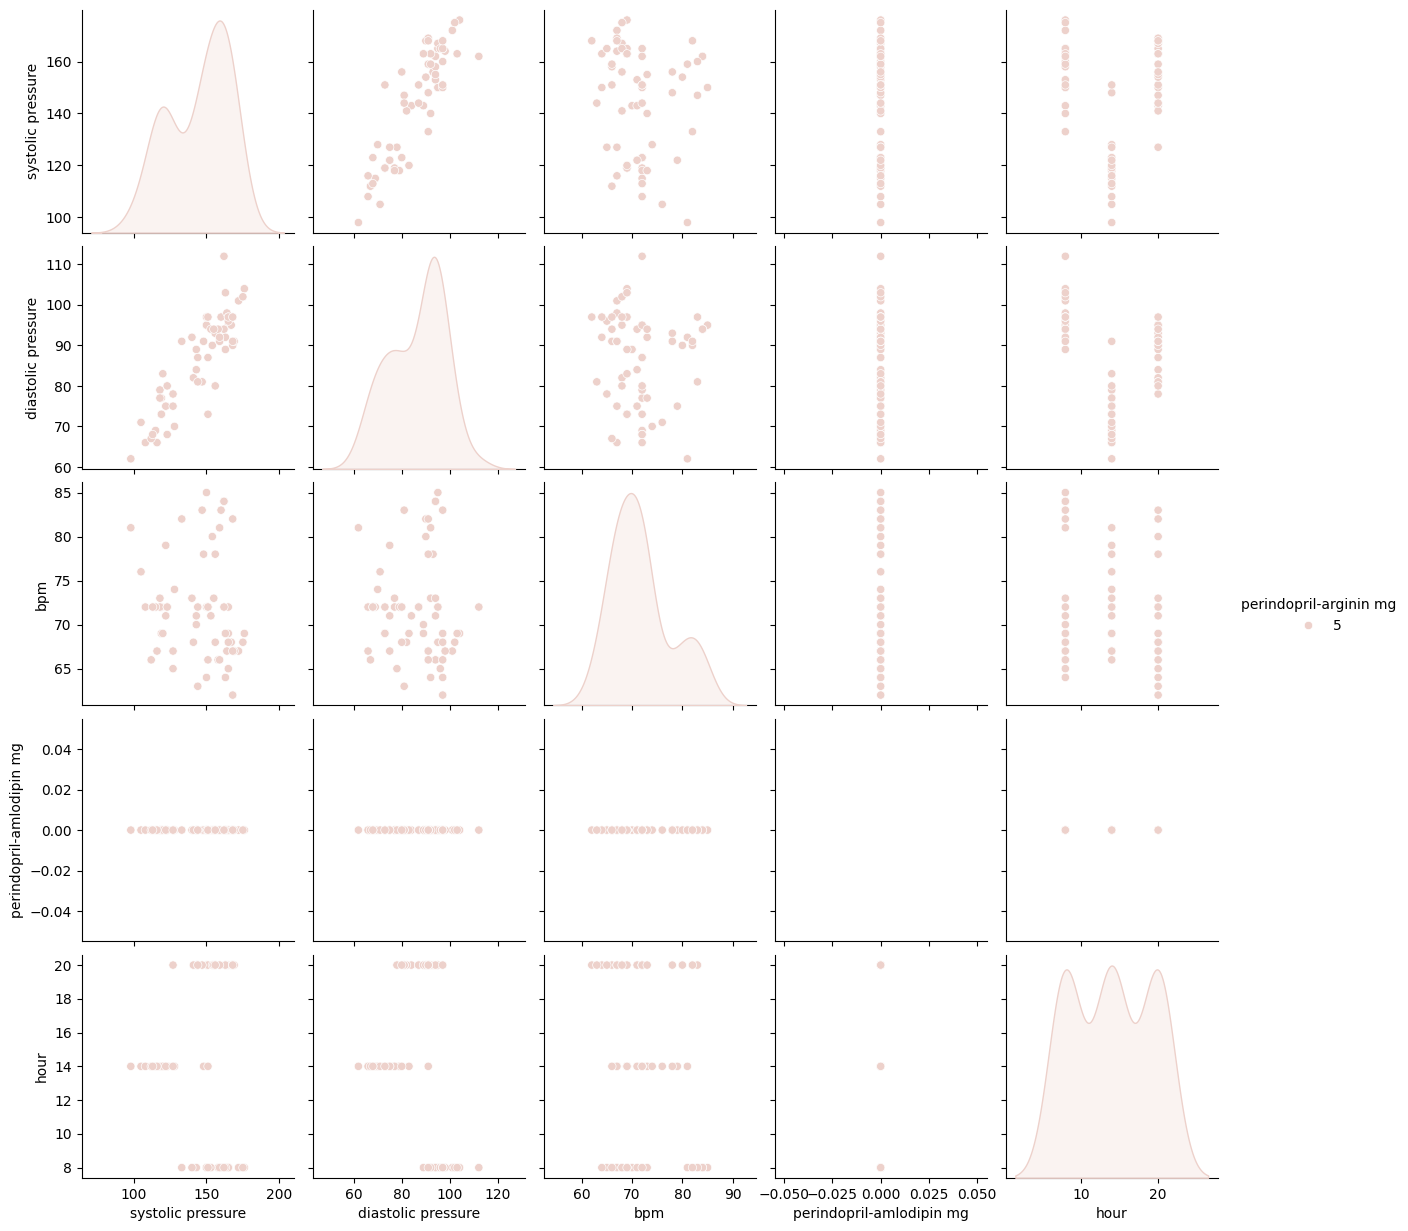

In [22]:
#analyse where amlodipin perindopril-arginin mg is 5 compared to all other data
plt.figure(figsize=(18, 8))
sns.pairplot(df[df['perindopril-arginin mg'] == 5], hue='perindopril-arginin mg')
plt.show()

In [23]:
#analyse with students t-test where amlodipin mg is 5 compared to all other data
from scipy.stats import ttest_ind
df_5 = df[df['perindopril-amlodipin mg'] == 5]
df_other = df[df['perindopril-amlodipin mg'] != 5]
t_stat, p_value = ttest_ind(df_5['bpm'], df_other['bpm'])
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 3.8105827090677495
p-value: 0.00020864723716954654


## 5 mg of perindopril-amlodipin

In [28]:
mean = df[df['perindopril-amlodipin mg'] == 5].drop(columns=['Timestamp', 'perindopril-arginin mg', 'perindopril-amlodipin mg', 'hour']).mean()
print(mean)


print(f"------------------------------------")

std_dev = df[df['perindopril-amlodipin mg'] == 5].drop(columns=['Timestamp', 'perindopril-arginin mg', 'perindopril-amlodipin mg', 'hour']).std()
print(std_dev)

systolic pressure     126.916667
diastolic pressure     80.395833
bpm                    75.208333
dtype: float64
------------------------------------
systolic pressure     15.676020
diastolic pressure     9.528768
bpm                    4.617074
dtype: float64
